In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [2]:
# generators
trainds = keras.utils.image_dataset_from_directory(
directory = r'C:\Users\Soorya\Downloads\cat_dog_1\cat_dog_1\train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size = (256,256)
)

testds = keras.utils.image_dataset_from_directory(
directory = r'C:\Users\Soorya\Downloads\cat_dog_1\cat_dog_1\test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [3]:
#normalize the images 
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
trainds = trainds.map(process)

In [4]:
# create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(trainds,epochs=10,validation_data=testds)

Epoch 1/10
125/125 [==============================] - 136s 1s/step - loss: 0.6869 - accuracy: 0.5663 - val_loss: 58.3875 - val_accuracy: 0.5930
Epoch 2/10
125/125 [==============================] - 134s 1s/step - loss: 0.6161 - accuracy: 0.6625 - val_loss: 42.2616 - val_accuracy: 0.6520
Epoch 3/10
125/125 [==============================] - 236s 2s/step - loss: 0.5597 - accuracy: 0.7128 - val_loss: 69.2589 - val_accuracy: 0.6810
Epoch 4/10
125/125 [==============================] - 683s 5s/step - loss: 0.4727 - accuracy: 0.7732 - val_loss: 110.2323 - val_accuracy: 0.6870
Epoch 5/10
125/125 [==============================] - 296s 2s/step - loss: 0.3821 - accuracy: 0.8207 - val_loss: 132.1742 - val_accuracy: 0.7160
Epoch 6/10
125/125 [==============================] - 172s 1s/step - loss: 0.2839 - accuracy: 0.8777 - val_loss: 135.5877 - val_accuracy: 0.7120
Epoch 7/10
125/125 [==============================] - 127s 1s/step - loss: 0.1811 - accuracy: 0.9268 - val_loss: 359.8272 - val_accur

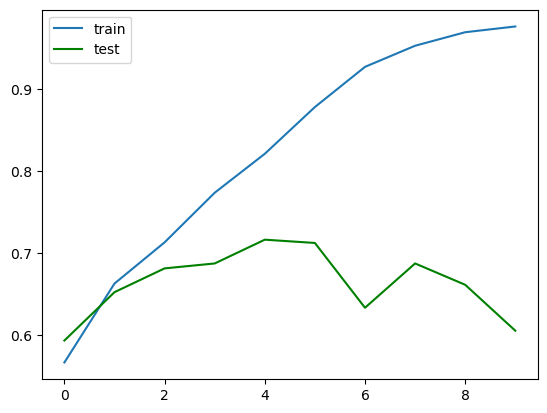

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test',color='green')
plt.legend()
plt.show()

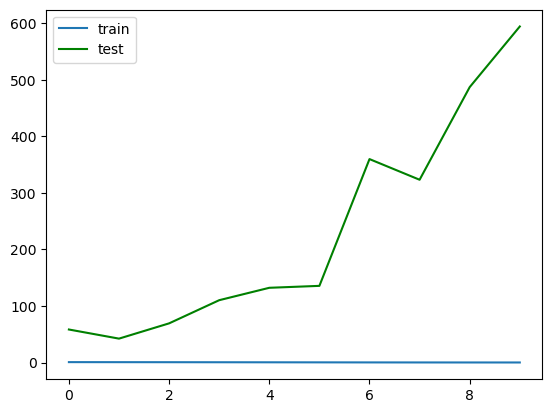

In [11]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test',color='green')
plt.legend()
plt.show()